In [2]:
[import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats]

Text(0.5, 1.0, 'Total billl and Tip')

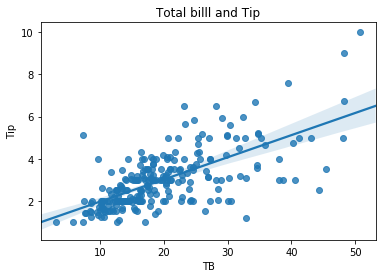

In [9]:
ax = plt.subplots()
tips = sns.load_dataset('tips')
tips
# regplot : 데이터를 점으로 나타내면서, 선형성을 함께 나타내줌
ax = sns.regplot(x='total_bill',y='tip',data=tips ) # fit_reg=False 선형 출력 안함
ax.set_xlabel('TB')
ax.set_ylabel('Tip')
ax.set_title('Total billl and Tip')

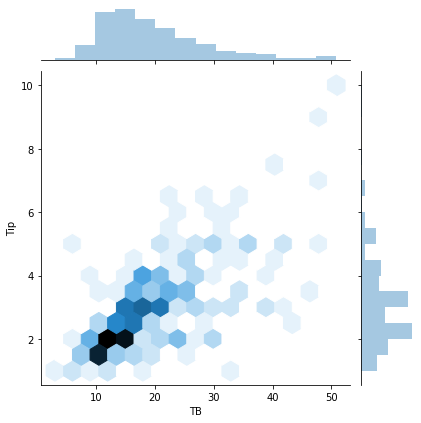

In [13]:
# 안쪽에 점 데이터 바깥쪽에 막대 그래프
# 데이터의 경향을 확인하기 좋음
joint = sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex') # kind='hex' 6각 분포로 출력
joint.set_axis_labels(xlabel='TB',ylabel='Tip')

Text(0.5, 1.0, 'Kernel Density Plot')

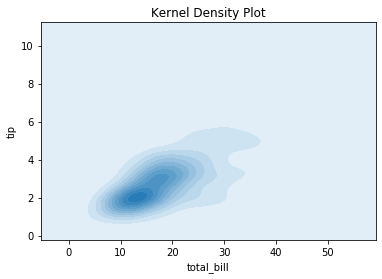

In [19]:
# 이차원 밀집도 그래프
kde, ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
           data2=tips['tip'],
           shade=True) # shade=True 
ax.set_title('Kernel Density Plot')

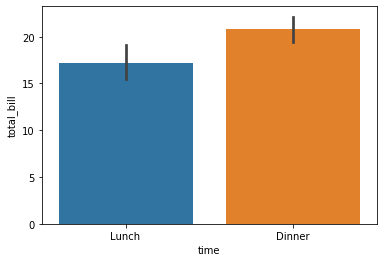

In [22]:
ax = plt.subplots()
ax = sns.barplot(x='time',y='total_bill',data=tips)

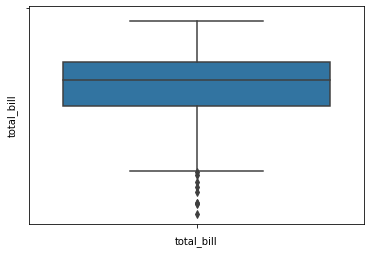

In [34]:
ax = plt.subplots()
sns.boxplot(x='total_bill',data=tips) # 가로 방향
sns.boxplot(x='total_bill',data=tips, orient='v') # vertical

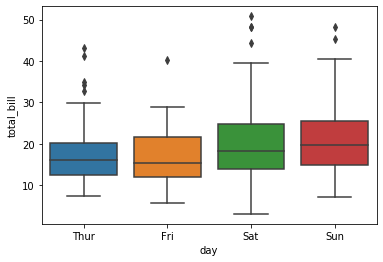

In [35]:
sns.boxplot(x = 'day', y = 'total_bill',data=tips)

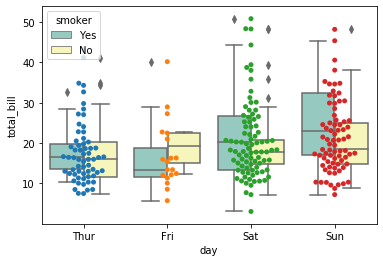

In [38]:
sns.boxplot(x = 'day', y = 'total_bill',data=tips, hue='smoker', palette='Set3')
sns.swarmplot(x = 'day', y = 'total_bill',data=tips)

In [39]:
# seaborn.pydata.org 
# seaborn과 관련된 내용들을 확인할 수 있다.

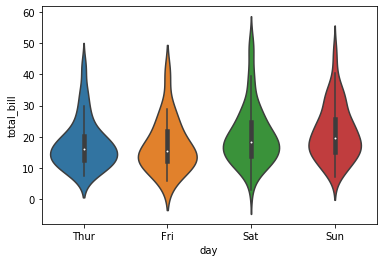

In [43]:
# sns.boxplot(x = 'day', y = 'total_bill',data=tips, hue='smoker', palette='Set3')
sns.violinplot(x = 'day', y = 'total_bill',data=tips)

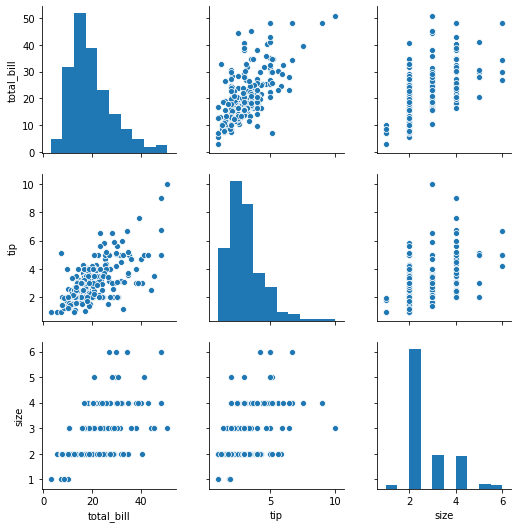

In [44]:
# 수치에 해당하는 그래프를 전반적으로 그려줌
# 관계그래프
sns.pairplot(data = tips)

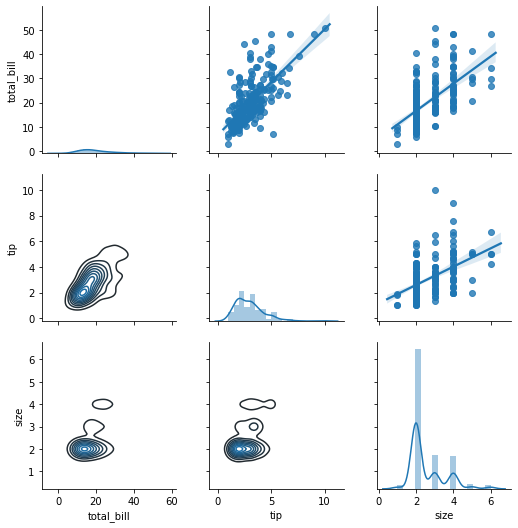

In [48]:
pg = sns.PairGrid(tips)
pg.map_upper(sns.regplot)
pg.map_lower(sns.kdeplot)
pg.map_diag(sns.distplot)

In [50]:
iris=sns.load_dataset('iris')
titanic=sns.load_dataset('titanic')
flights=sns.load_dataset('flights')

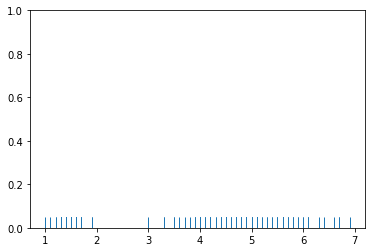

In [62]:
x = iris.petal_length.values
sns.rugplot(x)

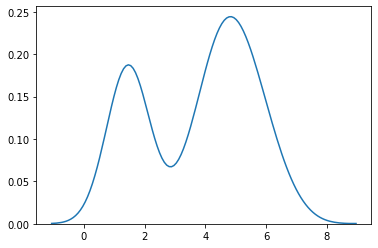

In [57]:
sns.kdeplot(x)

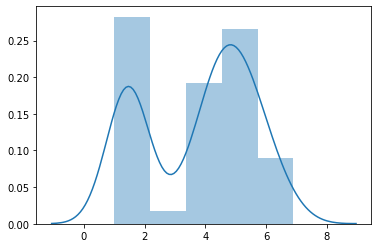

In [65]:
sns.distplot(x,kde=True)

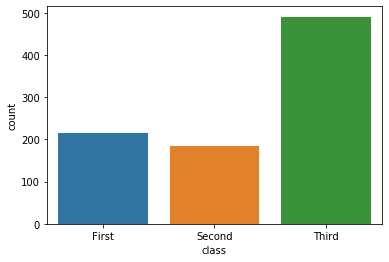

In [68]:
# countplot : 각 종류별 데이터가 얼마나 있는지 표시
sns.countplot(x='class',data=titanic)

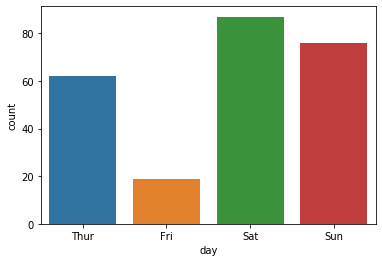

In [70]:
sns.countplot(x='day',data=tips)

In [71]:
'''
1차원 데이터 : 실수값, 실수분포 플롯
-> 커너밀도, 러그, rugplot, kdeplot, distplot

카테고리별 데이터가 얼마나 있는지
-> countplot

다차원데이터(변수가 여러개)
-> 2차원 실수형 데이터 : 스캐터플롯(jointplot)
-> 3차원 이상의 실수형 데이터 : pairplot(그리드 형테로 출력)
-> 만약 카테고리형이 포함되어 있으면 hue 속성 활용
-> 2차원 카테고리형 데이터 : heatmap
'''

'\n1차원 데이터 : 실수값, 실수분포 플롯\n-> 커너밀도, 러그, rugplot, kdeplot, distplot\n\n카테고리별 데이터가 얼마나 있는지\n-> countplot\n\n다차원데이터(변수가 여러개)\n-> 2차원 실수형 데이터 : 스캐터플롯(jointplot)\n-> 3차원 이상의 실수형 데이터 : pairplot(그리드 형테로 출력)\n-> 만약 카테고리형이 포함되어 있으면 hue 속성 활용\n-> 2차원 카테고리형 데이터 : heatmap\n'

In [99]:
titanic_size = titanic.pivot_table(index='class',columns='sex',aggfunc='size') # aggfunc='size' 각 데이터의 건수에 대해
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


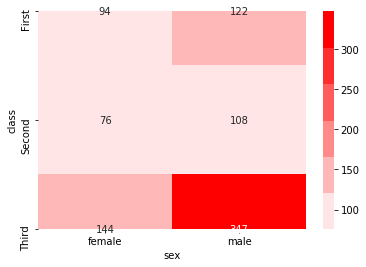

In [106]:
sns.heatmap(titanic_size, annot=True, fmt='d', cmap=sns.light_palette('red'))
# annot=True : 숫자가 출력될 수 있게
# fmt='d' : 지수형태의 숫자가 아닌 지수형태의 숫자로 변경
# cmap=sns.light_palette('red') : 색상 결정

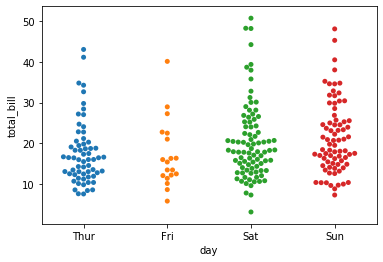

In [121]:
# 2차원 데이터 실수, 카테고리가 섞임
# sns.barplot(x='day',y='total_bill',data=tips)
# sns.violinplot(x='day',y='total_bill',data=tips)
# sns.stripplot(x='day',y='total_bill',data=tips, jitter=True)
sns.swarmplot(x='day',y='total_bill',data=tips)

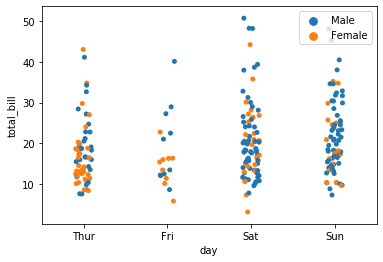

In [137]:
# 요일별, 성별 전체 팁의 히스토그램
# sns.barplot(data = tips,x='day',y='total_bill',hue='sex')
sns.stripplot(data = tips,x='day',y='total_bill',hue='sex')
plt.legend(loc=1)

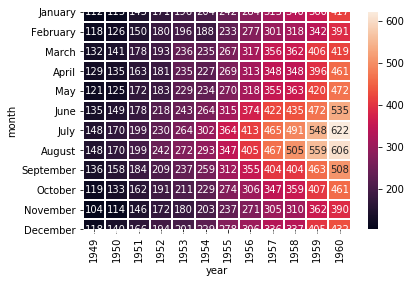

In [157]:
flights.head()
fp = flights.pivot('month','year','passengers') # 열인덱스, 행인덱스, 데이터    순서로 들어감
sns.heatmap(fp, linewidths=1,annot=True, fmt='d')

In [171]:
df = pd.DataFrame(np.random.randn(100,3),
            index=pd.date_range('1/28/2020',periods=100),
            columns=list('ABC'))
df

,A,B,C
2020-01-28,-1.498698,-0.719973,0.379756
2020-01-29,-3.191250,-0.293785,0.020021
2020-01-30,-0.372501,-0.579779,1.467629
2020-01-31,-0.429814,-1.014619,-1.513895
2020-02-01,-0.268929,-0.366404,-1.638597
...,...,...,...
2020-05-02,-0.157143,0.953447,-1.094043
2020-05-03,0.780033,-2.769969,-1.964070
2020-05-04,-0.084079,-1.133093,-0.054920
2020-05-05,-0.080787,-1.106804,1.645203


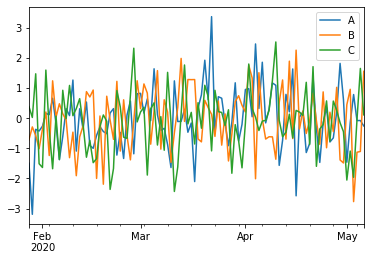

In [172]:
df.plot() # 판다스 데이터프레임에서 각 열에 대해서 그래프를 그릴 수 있음

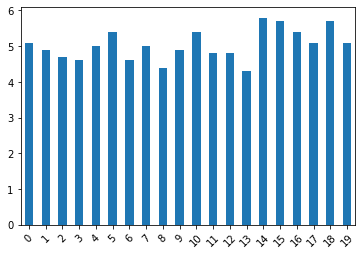

In [183]:
iris.sepal_length[:20].plot(kind='bar',rot=45)
# rot=0 회전각도를 줄 수 있다.

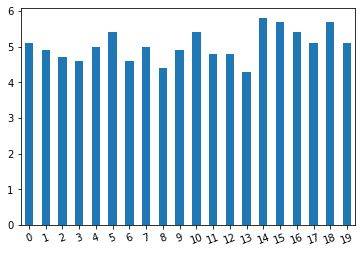

In [187]:
iris.sepal_length[:20].plot.bar(rot=20) # 이런식의 문법도 가능

In [189]:
df2 = iris.groupby(iris.species).mean()
df2

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


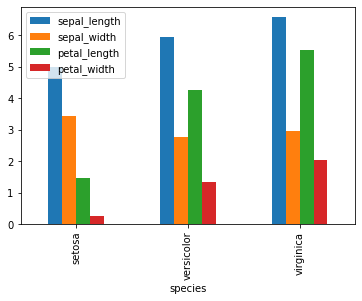

In [192]:
df2.plot.bar()

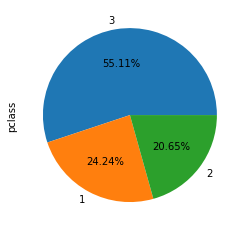

In [196]:
df = titanic.pclass.value_counts()
df.plot.pie(autopct='%.2f%%')

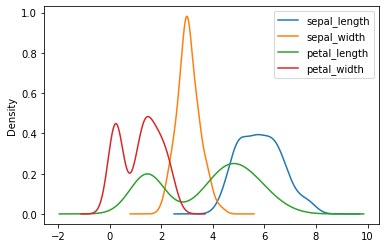

In [199]:
# iris.plot.hist()
iris.plot.kde()

In [209]:
# 선형대수 -> 대량의 데이터를 연산하는 복잡한 과정을 간단하게 표현할 수 있음

'''
데이터 개수, 형태에 따라서
스칼라(숫자 1개), 벡터(숫자 여러개),
행렬(벡터가 여러개인 데이터 집합),
텐서(같은 크기의 행렬이 여러개 있는 것)
'''

from sklearn.datasets import load_iris
iris = load_iris()
iris.data[0,:]

array([5.1, 3.5, 1.4, 0.2])

In [211]:
# 각 행이 차원 수와 같다
# 넘파이 선형대수 문제 해결을 위해 사용
x1 = np.array([[5.1],[3.1],[1.4],[0.2]])
x1 
# 2차원 배열 4차원 벡터

array([[5.1],
       [3.1],
       [1.4],
       [0.2]])

In [223]:
from sklearn.datasets import load_digits

digits = load_digits()
digits
samples=[0,10,20,30,1,11,21,31]

d = []
for i in range(8):
    d.append(digits.images[samples[i]])
d

[array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
        [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
        [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
        [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
        [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
        [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
        [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
        [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]]),
 array([[ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.],
        [ 0.,  0., 11., 16., 16., 16.,  2.,  0.],
        [ 0.,  4., 16.,  9.,  1., 14.,  2.,  0.],
        [ 0.,  4., 16.,  0.,  0., 16.,  2.,  0

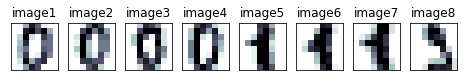

In [230]:
plt.figure(figsize=(8,2))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(d[i], cmap=plt.cm.bone_r)
    plt.title("image{}".format(i+1))
    plt.grid(False)
    plt.xticks([]); plt.yticks([])

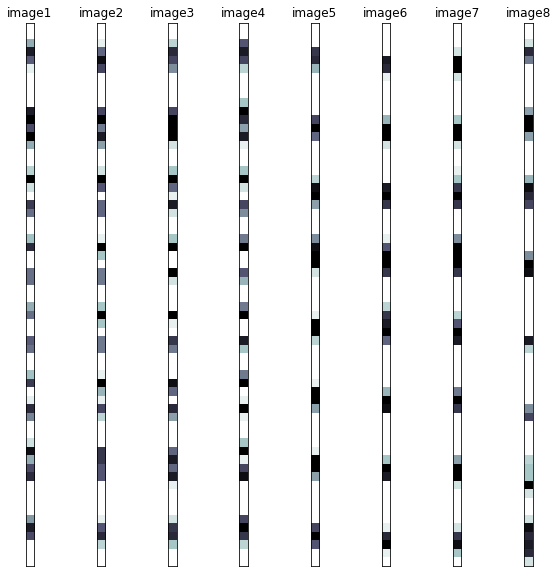

In [236]:
# 2차원 이미지 => 64차원 데이터 ==> 1차원 벡터로 나타내보자.
v=[]
for i in range(8):
    v.append(d[i].reshape(64,1))
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(v[i], cmap=plt.cm.bone_r)
    plt.title("image{}".format(i+1))
    plt.grid(False)
    plt.xticks([]); plt.yticks([])

In [238]:
# 행렬  4차원 행렬
# 행렬의 요소 혹은 성분
# 행렬에서는 행백터 열백터가 있음
# [x11 x12 x13 x14
#  x11 x12 x13 x14
#  x11 x12 x13 x14
#  x11 x12 x13 x14]
## ndim = 2 인 이차원배열로 행렬을 나타냄

a = np.array([[10,20,30],[40,50,60]])
a

array([[10, 20, 30],
       [40, 50, 60]])

In [239]:
# 텐서 : 같은 크기의 행렬이 여러 개 묶여 있는 것
# 다차원 배열 보다는 맵핑에 대해 애기하는 것이 좀더 옳다고 봄
from scipy import misc
img = misc.face()
img.shape

(768, 1024, 3)

(-0.5, 1023.5, 767.5, -0.5)

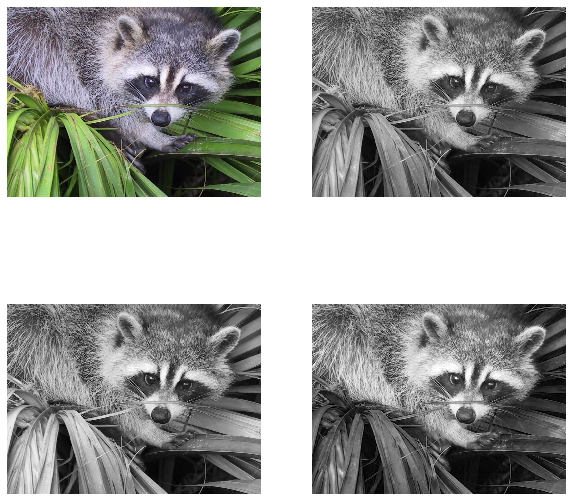

In [259]:
plt.figure(figsize=(10,10))
plt.subplot(221)# 2*2 로 나눔, 1번째 위치 출력
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(222) # R
plt.imshow(img[:,:,0], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(223) # G
plt.imshow(img[:,:,1], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(224) # B
plt.imshow(img[:,:,2], cmap=plt.cm.gray)
plt.axis('off')

In [267]:
# 두 벡터와 행렬에서 같은 위치에 있는 요소끼리
# 덧셈/뺄셈 수행 -> 요소간 연산
x = np.array([1,2])
y = np.array([3,4])
# 두 벡터간 연산 요소들 간의 연산을 진행
x+y
x-y
x*y
x/y
# 스칼라와 벡터/행렬간 곱셈
# 선형조합 : 벡터/행렬에 스칼라값을 곱한 후 더하거나 뺀 것 => 벡터/행렬의 선형조합이라고 함.

# 내적 : 두 벡터의 곱셈(dot) 
# 내적의 조건 : 두 벡터의 차원이 같아야함
# 행벡터 * 열벡터

x = np.array([[1],[2],[3]])
y = np.array([[4],[5],[6]])
np.dot(x.T,y)
x.T@y # @ : 내적 기호 : dot 과 동일함

array([[32]])

In [269]:
'''
데이터벡터, 가중치벡터 => 데이터 벡터의 가중치 합
가중평균

벡터의 내적은 두 벡터의 유사도를 계산하는데 활용이 된다.
유사도 : 두 벡터가 닮은 정도
코사인유사도 : 두 벡터의 사잇각을 고려한 닮은 정도
'''

'\n데이터벡터, 가중치벡터 => 데이터 벡터의 가중치 합\n가중평균\n\n벡터의 내적은 두 벡터의 유사도를 계산하는데 활용이 된다.\n유사도 : 두 벡터가 닮은 정도\n코사인유사도 : 두 벡터의 사잇각을 고려한 닮은 정도\n'

In [275]:
digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]

In [288]:
v1 = d1.reshape(64,1)
v2 = d2.reshape(64,1)
v3 =d3.reshape(64,1)
v4 = d4.reshape(64,1)
plt.figure(figsize=(8,9))

import matplotlib.gridspec as gridspec

<Figure size 576x648 with 0 Axes>

In [289]:
gs = gridspec.GridSpec(1,8, height_ratios=[1],
                 width_ratios=[9,1,9,1,9,1,9,1])


In [290]:
for i in range(4):
    plt.subplot(gs[2*1])
    plt.imshow(eval('d'+str(i+1)),cmap=plt.cm,gray)
    plt.subplot(gs[2*i])
    plt.imshow()

SyntaxError: positional argument follows keyword argument (<ipython-input-290-3de43628e0ea>, line 3)

In [292]:
v1.T @ v3v





array([[1866.]])